# Nuclear Game (NG) - Clustering

In [1]:
import ng_tools as ngt
import matplotlib.pyplot as plt

### Path to CSV file 
Path to CSV file (output of NG-Segmentation/NG-Analysis)

In [2]:
path = "/Volumes/emilio_passport/nuclei/data/d6Ngn2/out_ng/filtered_output.csv"

## Start NG - Clustering

In [3]:
ngc = ngt.NuclearGame_Clustering(path)

Data is stored as a DataFrame:

In [4]:
ngc.data

,avg_intensity_b3,avg_intensity_core_dapi,avg_intensity_dapi,avg_intensity_external_ring_dapi,avg_intensity_gfap,avg_intensity_internal_ring_dapi,avg_intensity_rfp,axes_ratio,b3_positive,cell_no,...,total_intensity_core_dapi,total_intensity_dapi,total_intensity_external_ring_dapi,total_intensity_gfap,total_intensity_internal_ring_dapi,total_intensity_rfp,x_pos,y_pos,dna_dots,spatial_entropy
0,871,3033,2623,776,827,1900,183,0.587,False,2,...,724895,1508314,131843,475799,285074,105395,743,8,7,3.837
1,828,1951,1735,583,1966,1375,174,0.520,False,3,...,688573,1535656,184119,1740271,390573,153590,196,55,8,3.896
2,617,2609,2269,755,1003,1846,169,0.734,False,4,...,600124,1406824,187280,621998,398797,104872,852,58,5,3.906
3,855,2664,2335,1042,1037,1913,164,0.921,False,5,...,652687,1496802,258388,664662,413310,105216,393,135,9,3.901
4,960,2756,2424,1063,1013,1990,165,0.938,True,7,...,628362,1435289,246670,599613,398016,97557,411,155,4,3.922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,841,5500,4100,1161,2909,3066,437,0.641,True,55,...,704009,1467954,227583,1041568,496669,156564,905,1023,2,3.881
416,6018,4858,4079,1146,1822,3381,1719,0.573,True,56,...,490608,1268461,210888,566575,507215,534652,22,1030,3,3.896
417,870,4977,4082,1205,1898,3406,288,0.829,True,57,...,647008,1469673,241051,683275,565415,103570,856,1064,3,3.889
418,3844,3588,3199,1022,1191,2736,1487,0.493,True,58,...,656551,1410594,216759,525042,492444,655574,815,1070,6,3.921


We create a list with the features that we want to include for dimensionality reduction:

In [5]:
features = [
    'avg_intensity_b3', 
    'avg_intensity_dapi',
    #'avg_intensity_internal_ring_dapi', 
    'avg_intensity_rfp', 
    'axes_ratio',
    #'circularity', 
    #'eccentricity',
    #'major_axis', 
    #'minor_axis', 
    'nuclear_area',
    #'nuclear_perimeter',
    #'solidity',
    'dna_dots', 
    'spatial_entropy'
]

### Scale data

In [6]:
ngc.scale_data(features = features, method = "StandardScaler")

### Reduce dimensions with UMAP

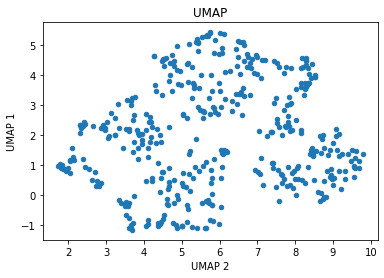

In [8]:
ngc.umap_reduction(show_plot = True, size = 20)

### Find optimal number of clusters

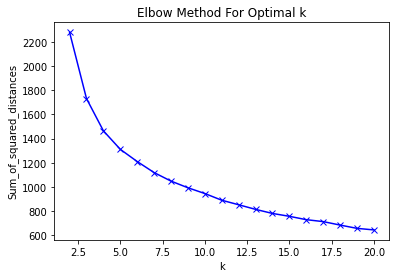


Optimal number of clusters: 7


In [9]:
ngc.optimalClusters(show_plot = True)

### Do a clusterable embedding for a better clustering

In [10]:
ngc.clusterableEmbedding(n_neighbors = 50, min_dist = 0.0, n_components = 2)

### KMeans Clustering

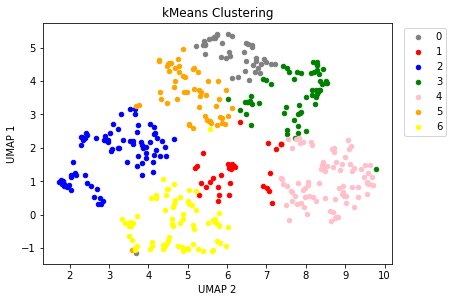

In [11]:
ngc.kmeans_clustering(show_plot = True, size = 20)

### Obtain Clustered DataFrame

In [12]:
ngc.clustered_df = ngc.assignCluster()

### Show UMAP as Heatmap for a Nuclear Feature

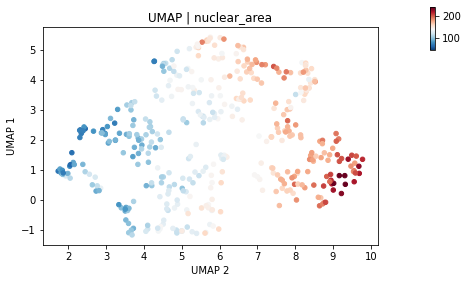

In [18]:
fig = ngc.scatter_heatmap(feature = "nuclear_area", size = 20, cmap = "RdBu_r")
plt.show()